In [5]:
report=[]
n=0

# Calling All the Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, StandardScaler, PolynomialFeatures
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, silhouette_score, SCORERS, f1_score
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC

# SMOTE
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, SMOTENC

import warnings
warnings.filterwarnings("ignore")

import time

# EDA

In [74]:
# Reading and merging the training files
train1=pd.read_csv('train_1.csv')
train2=pd.read_csv('train_2.csv')
train3= pd.read_csv('train_3.csv')
train4=pd.merge(train1,train2,how='outer')
train=pd.merge(train4,train3,how='outer')

#renaming the columns
train.columns=['Ref.No','Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August','default',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July','amount of bill statement in May',
              'amount of bill statement in April','amount paid in September',
              'amount paid in August','amount paid in July',
              'amount paid in June','amount paid in May',
              'amount paid in April']
train.drop(['Ref.No'],axis=1,inplace=True)
# drop duplicates
print(train.duplicated().sum())
train.drop_duplicates(inplace=True)
print(train.shape)

# dropping irrelevant columns and splitting independent and target variables
x_train=train.drop(['default'],axis=1)
y_train=train.default

#Repeating the process for test dataset
x_test= pd.read_csv('test.csv')[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
                                 'X8','X9','X10','X11','X12','X13','X14',
                                 'X15','X16','X17','X18','X19','X20','X21','X22','X23']]

x_test.columns=['Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July','amount of bill statement in May',
              'amount of bill statement in April','amount paid in September',
              'amount paid in August','amount paid in July',
              'amount paid in June','amount paid in May',
              'amount paid in April']

# removing correlated columns
#x_train.drop(['amount of bill statement in September','amount of bill statement in July','amount of bill statement in May'],axis=1, inplace=True)
#x_test.drop(['amount of bill statement in September','amount of bill statement in July','amount of bill statement in May'],axis=1,inplace=True)

19
(21581, 24)


In [75]:
x_train.shape
train_length=x_train.shape[0]

### Balancing the Dataset
x_train,y_train=SMOTE(sampling_strategy=.7).fit_resample(x_train,y_train)
print(x_train.shape)
train_length=x_train.shape[0]

In [76]:
### Applying clustering
x_t=pd.concat([x_train,x_test])
cluster = KMeans(n_clusters=3).fit_predict(x_t)
x_t['cluster']=cluster
x_train=x_t.iloc[:train_length,:]
x_test=x_t.iloc[train_length:,:]

### Feature Engineering
x_t=pd.concat([x_train,x_test])
for col in ['repayment status in September','repayment status in August', 'repayment status in july',
            'repayment status in june', 'repayment status in may','repayment status in april']:
    x_t[col+'=0']=pd.Series(x_t[col]==0)
    x_t[col+'=-1']=pd.Series(x_t[col]==-1)
    x_t[col+'=-2']=pd.Series(x_t[col]==-2)
    x_t[x_t[col]<=0]=0
x_train=x_t.iloc[:21600,:]
x_test=x_t.iloc[21600:,:]

In [46]:
### scaling
ss= StandardScaler()
scaledx_train= ss.fit_transform(x_train)
scaledx_test=ss.transform(x_test)

In [51]:
### GBoost

gb=GradientBoostingClassifier(learning_rate=0.01, random_state=None, n_estimators=200)
#learning_rate=[.005,.01,.05]
#n_estimators=[200,300,400]
#loss=['exponential','deviance']
#max_depth=[2,3,4]
#random_state=[1,2,3]
#param_grid={'max_depth':max_depth,'random_state':random_state}

#rs=RandomizedSearchCV(gb,param_distributions=param_grid)
bg=AdaBoostClassifier(base_estimator=gb,algorithm='SAMME',learning_rate=.2,n_estimators=10)
model=bg.fit(scaledx_train,y_train)
scores=cross_val_score(model,scaledx_train,y_train)

y_pred=model.predict(scaledx_test)

n+=1

report.append([time.ctime(),str(model).partition('(')[0]+str(n),'Accuracy',scores.mean(),scores.var(),scores.std()*2,
               'Ada(GradBoost)',model])

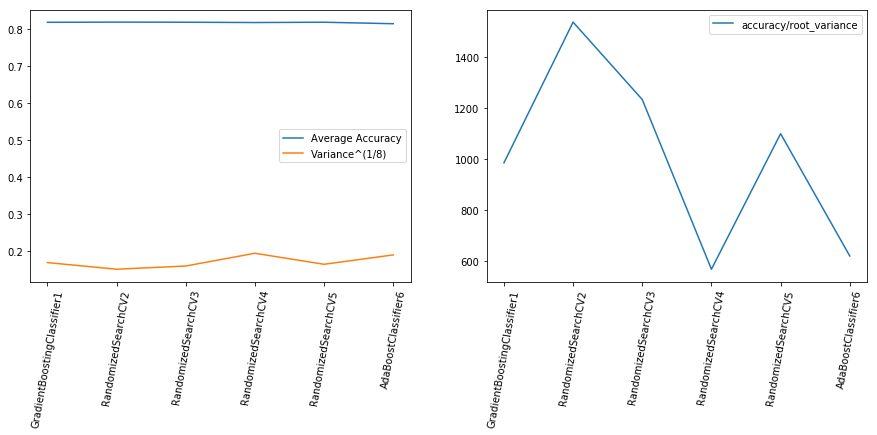

,Time_Stamp,Metric,Metric(Avg.),Variance,CI(+/-),Remark,stored model
Model,,,,,,,
GradientBoostingClassifier1,Wed Aug 7 00:35:58 2019,Accuracy,0.818148,6.897885e-07,0.001661,base model + scaling,([DecisionTreeRegressor(criterion='friedman_ms...
RandomizedSearchCV2,Wed Aug 7 00:50:29 2019,Accuracy,0.818657,2.829829e-07,0.001064,base model + scaling + clustering,"RandomizedSearchCV(cv='warn', error_score='rai..."
RandomizedSearchCV3,Wed Aug 7 01:01:39 2019,Accuracy,0.818380,4.396322e-07,0.001326,base model + scaling + clustering + dropping cols,"RandomizedSearchCV(cv='warn', error_score='rai..."
RandomizedSearchCV4,Wed Aug 7 01:10:30 2019,Accuracy,0.817546,2.080028e-06,0.002884,base model + scaling + clustering + dropping cols,"RandomizedSearchCV(cv='warn', error_score='rai..."
RandomizedSearchCV5,Wed Aug 7 01:30:09 2019,Accuracy,0.818359,5.533867e-07,0.001488,base model + scaling + clustering,"RandomizedSearchCV(cv='warn', error_score='rai..."
AdaBoostClassifier6,Wed Aug 7 01:41:15 2019,Accuracy,0.814327,1.732147e-06,0.002632,Ada(GradBoost),(([DecisionTreeRegressor(criterion='friedman_m...


In [52]:

Final_report=pd.DataFrame(report,columns=['Time_Stamp','Model', 'Metric', 'Metric(Avg.)', 'Variance', 'CI(+/-)','Remark','stored model'])
Final_report.set_index("Model",inplace=True)

plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(Final_report.index,Final_report['Metric(Avg.)'],label='Average Accuracy')
plt.plot(Final_report.index,np.sqrt(np.sqrt(np.sqrt(Final_report['Variance']))),label='Variance^(1/8)')
plt.xticks(rotation=80)
plt.legend()

plt.subplot(122)
plt.plot(Final_report.index,Final_report['Metric(Avg.)']/np.sqrt(Final_report['Variance']),label='accuracy/root_variance')
plt.xticks(rotation=80)
plt.legend()

plt.show()

Final_report

In [49]:
model.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [50]:
y_pred=Final_report.loc['RandomizedSearchCV5','stored model'].predict(scaledx_test)
pd.DataFrame(y_pred).to_clipboard()

In [77]:
Final_report.to_clipboard()

In [11]:
report=report[:-1]
n=n-1